# Projeto de Machine Learning: Previsão de Sobrevivência no Titanic

## Objetivo
O objetivo deste notebook é construir um modelo de machine learning capaz de prever se um passageiro sobreviveu ou não ao desastre do Titanic. Utilizaremos o famoso dataset do Kaggle para treinar e avaliar nossos modelos.

## Passos do Projeto
1.  **Importação de Bibliotecas**: Carregar as ferramentas necessárias.
2.  **Carregamento dos Dados**: Importar os arquivos `train.csv` e `test.csv`.
3.  **Análise Exploratória de Dados (EDA)**: Entender a estrutura, as variáveis e os padrões nos dados.
4.  **Pré-processamento e Engenharia de Features**: Limpar os dados, tratar valores ausentes e criar novas variáveis.
5.  **Divisão dos Dados**: Separar o conjunto de treino para validação.
6.  **Modelagem**: Treinar algoritmos de classificação.
7.  **Avaliação**: Medir a performance dos modelos.
8.  **Otimização**: Fazer a tunagem de hiperparâmetros.
9.  **Submissão**: Gerar o arquivo final para o Kaggle.

In [4]:
# Célula 1: Importações

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Modelagem e Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [5]:
# Célula 2: Carregando os datasets de treino e teste

# Carregando os arquivos CSV para DataFrames do pandas
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Guardar o ID dos passageiros do conjunto de teste para a submissão final
passenger_id_test = df_test['PassengerId']

print("Dimensões do dataset de treino:", df_train.shape)
print("Dimensões do dataset de teste:", df_test.shape)

# Visualizar as primeiras linhas do dataset de treino para entender a estrutura
print("\nPrimeiras 5 linhas do dataset de treino:")
df_train.head()

Dimensões do dataset de treino: (891, 12)
Dimensões do dataset de teste: (418, 11)

Primeiras 5 linhas do dataset de treino:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Célula 3: Informações básicas do dataset de treino
print("Informações gerais do dataset de treino:")
df_train.info()

print("\n\nEstatísticas descritivas (apenas para colunas numéricas):")
df_train.describe()

Informações gerais do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Estatísticas descritivas (apenas para colunas numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Célula 4: Verificando valores ausentes (missing values)
print("Valores ausentes no dataset de treino:")
print(df_train.isnull().sum())

print("\nValores ausentes no dataset de teste:")
print(df_test.isnull().sum())

Valores ausentes no dataset de treino:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores ausentes no dataset de teste:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


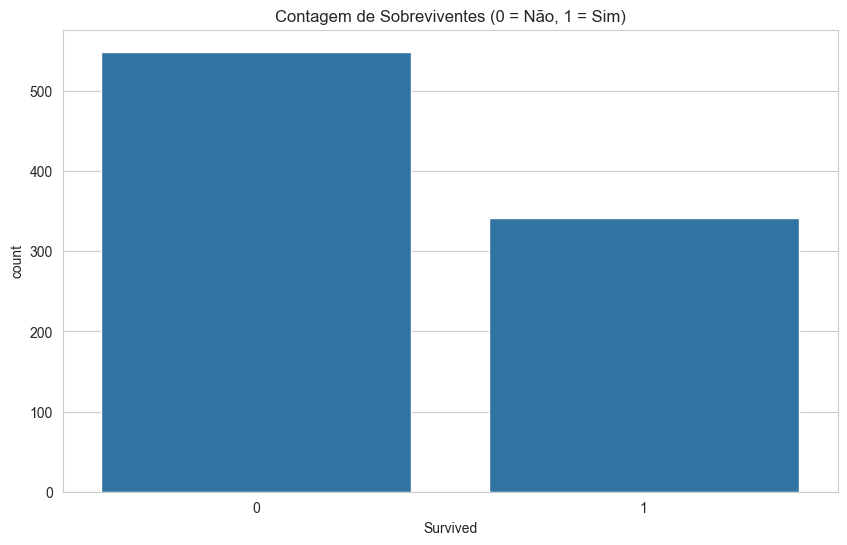

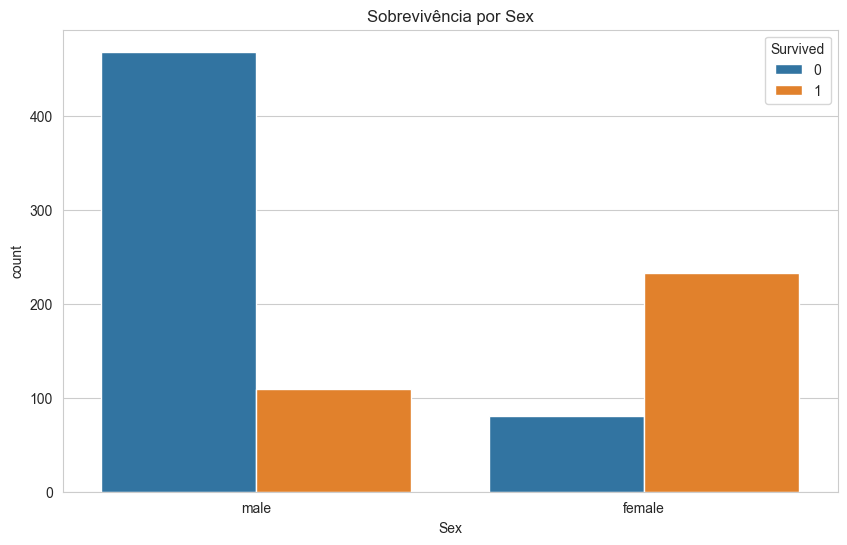

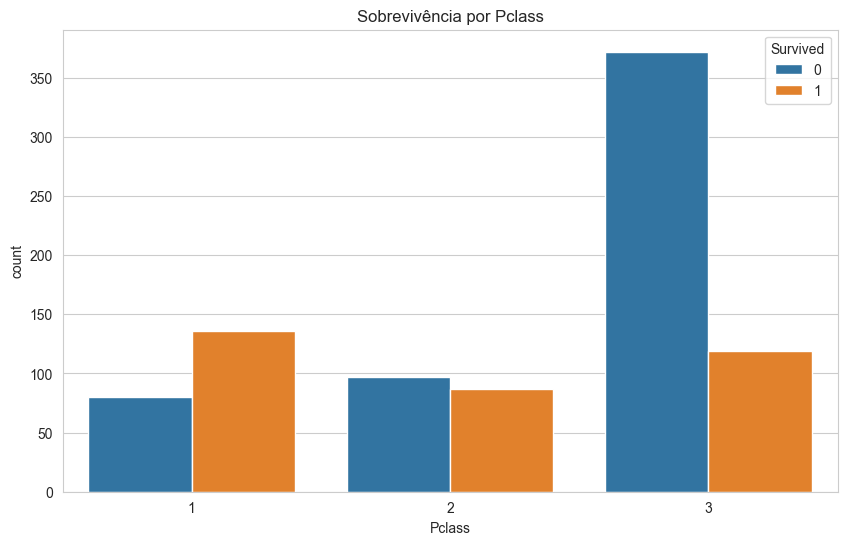

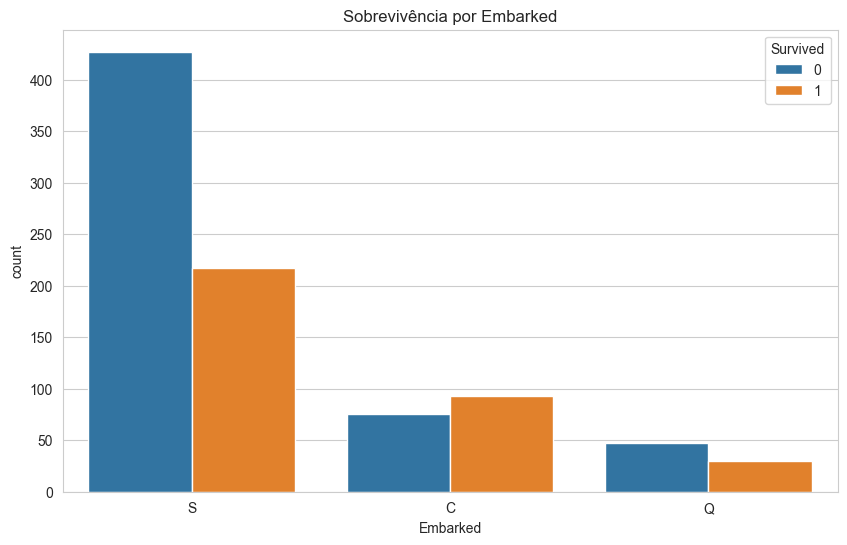

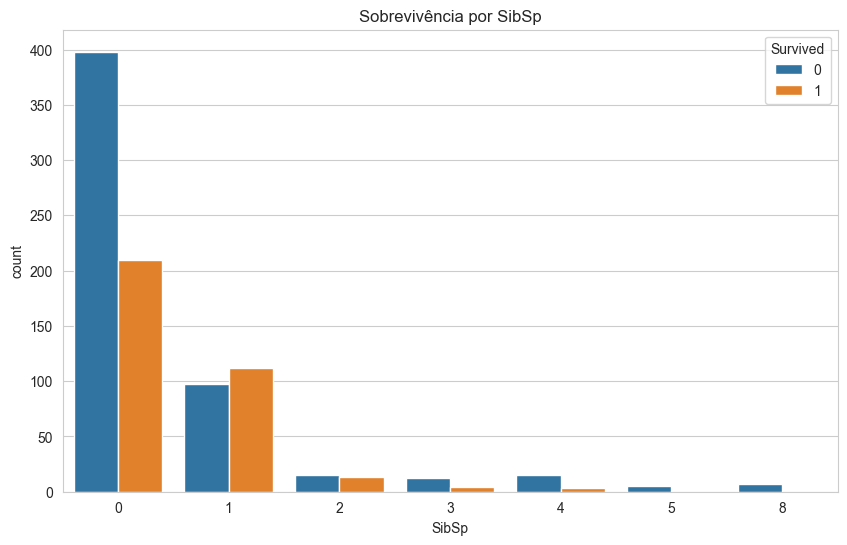

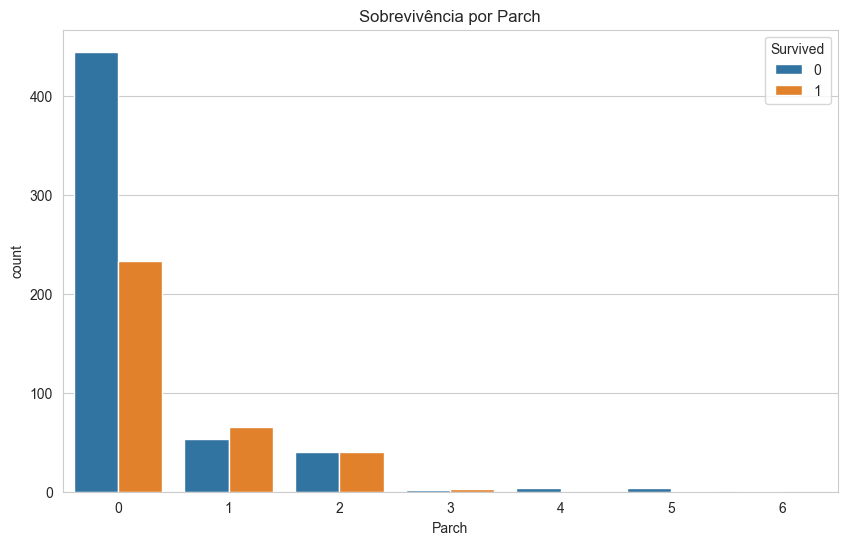

In [8]:
# Célula 5: Visualizando a variável alvo 'Survived'
sns.countplot(x='Survived', data=df_train)
plt.title('Contagem de Sobreviventes (0 = Não, 1 = Sim)')
plt.show()

# Análise de sobrevivência por features categóricas
features_cat = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

for feature in features_cat:
    sns.countplot(x=feature, hue='Survived', data=df_train)
    plt.title(f'Sobrevivência por {feature}')
    plt.show()

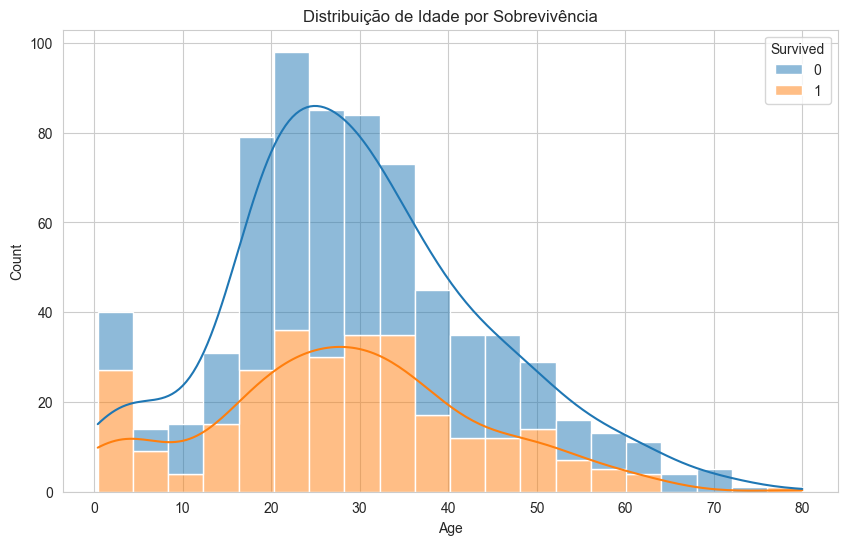

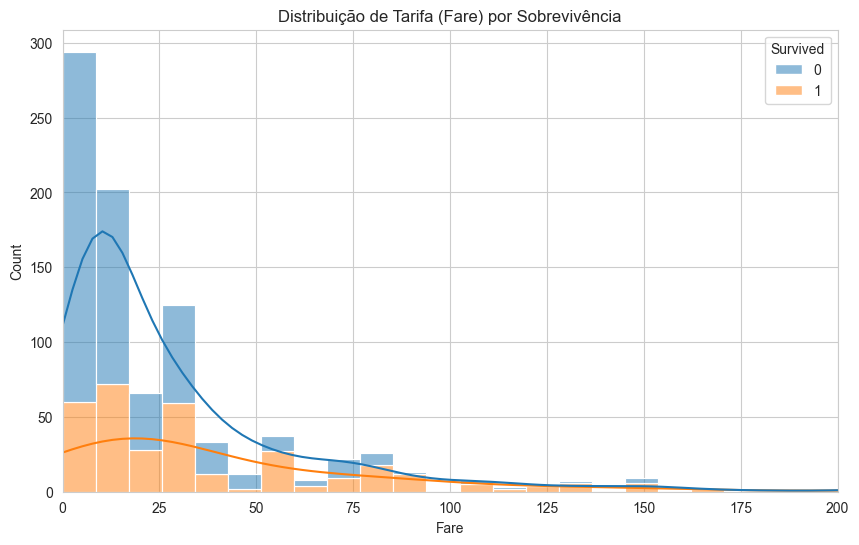

In [9]:
# Célula 6: Análise de sobrevivência por features numéricas
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

sns.histplot(data=df_train, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.title('Distribuição de Tarifa (Fare) por Sobrevivência')
plt.xlim(0, 200) # Limitar o eixo x para melhor visualização
plt.show()

In [10]:
# Célula 7: Tratando valores ausentes e criando features
# Vamos combinar os dataframes para aplicar as transformações de uma só vez
df_combined = pd.concat([df_train.drop('Survived', axis=1), df_test], ignore_index=True)

# 1. Tratar 'Age': Preencher com a mediana
median_age = df_combined['Age'].median()
df_combined['Age'].fillna(median_age, inplace=True)

# 2. Tratar 'Fare': Preencher com a mediana (para o único valor ausente no teste)
median_fare = df_combined['Fare'].median()
df_combined['Fare'].fillna(median_fare, inplace=True)

# 3. Tratar 'Embarked': Preencher com a moda (valor mais comum)
mode_embarked = df_combined['Embarked'].mode()[0]
df_combined['Embarked'].fillna(mode_embarked, inplace=True)

# 4. Feature 'Cabin': Muitos valores ausentes, vamos remover
df_combined.drop('Cabin', axis=1, inplace=True)

# 5. Engenharia de Features Simples: Tamanho da Família
df_combined['FamilySize'] = df_combined['SibSp'] + df_combined['Parch'] + 1
df_combined['IsAlone'] = (df_combined['FamilySize'] == 1).astype(int)

# 6. Converter features categóricas em numéricas (One-Hot Encoding)
# Usamos pd.get_dummies para transformar 'Sex' e 'Embarked' em colunas numéricas
df_combined = pd.get_dummies(df_combined, columns=['Sex', 'Embarked'], drop_first=True)

# 7. Remover colunas que não serão úteis
# 'Name' e 'Ticket' são muito únicos. 'PassengerId' já foi salvo.
df_combined.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

# Separar os dataframes de volta para treino e teste
X = df_combined.iloc[:len(df_train)] # As primeiras 891 linhas são do treino
X_test_final = df_combined.iloc[len(df_train):] # O resto é do teste

# Nossa variável alvo (y)
y = df_train['Survived']

print("Pré-processamento concluído!")
print("Dimensões de X (features de treino):", X.shape)
print("Dimensões de y (alvo de treino):", y.shape)
print("Dimensões de X_test_final (features de teste):", X_test_final.shape)

X.head()

Pré-processamento concluído!
Dimensões de X (features de treino): (891, 8)
Dimensões de y (alvo de treino): (891,)
Dimensões de X_test_final (features de teste): (418, 8)


,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,True,False,True
1,1,38.0,71.2833,2,0,False,False,False
2,3,26.0,7.9250,1,1,False,False,True
3,1,35.0,53.1000,2,0,False,False,True
4,3,35.0,8.0500,1,1,True,False,True


In [11]:
# Célula 8: Dividindo os dados de treino para validação interna
# Isso nos permite avaliar o modelo antes de prever nos dados de teste finais
# 80% para treino, 20% para validação (teste local)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Garante que a divisão seja a mesma sempre
    stratify=y # Mantém a proporção de sobreviventes nos dois conjuntos
)

print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de validação:", X_val.shape)

Dimensões do conjunto de treino: (712, 8)
Dimensões do conjunto de validação: (179, 8)


In [12]:
# Célula 9: Treinando o Modelo 1 - Árvore de Decisão (Decision Tree)

# Instanciando o classificador
dt_model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados de treino
dt_model.fit(X_train, y_train)

# Fazendo previsões nos dados de validação
y_pred_dt = dt_model.predict(X_val)

print("Modelo de Árvore de Decisão treinado!")

Modelo de Árvore de Decisão treinado!


In [13]:
# Célula 10: Treinando o Modelo 2 - Floresta Aleatória (Random Forest)

# Instanciando o classificador
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazendo previsões nos dados de validação
y_pred_rf = rf_model.predict(X_val)

print("Modelo de Floresta Aleatória treinado!")

Modelo de Floresta Aleatória treinado!


Acurácia (Árvore de Decisão): 0.7989

Matriz de Confusão (Árvore de Decisão):


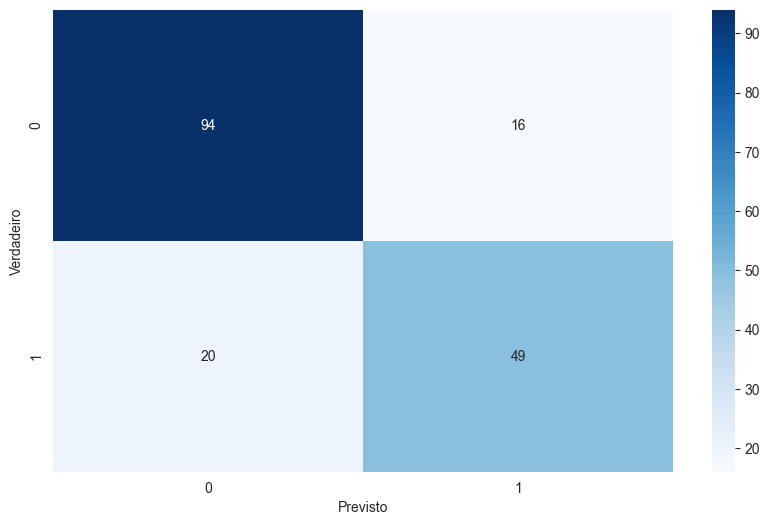


Relatório de Classificação (Árvore de Decisão):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [14]:
# Célula 11: Avaliando o Modelo de Árvore de Decisão

# Acurácia
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Acurácia (Árvore de Decisão): {accuracy_dt:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão (Árvore de Decisão):")
sns.heatmap(confusion_matrix(y_val, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação (Árvore de Decisão):")
print(classification_report(y_val, y_pred_dt))


Acurácia (Floresta Aleatória): 0.8045

Matriz de Confusão (Floresta Aleatória):


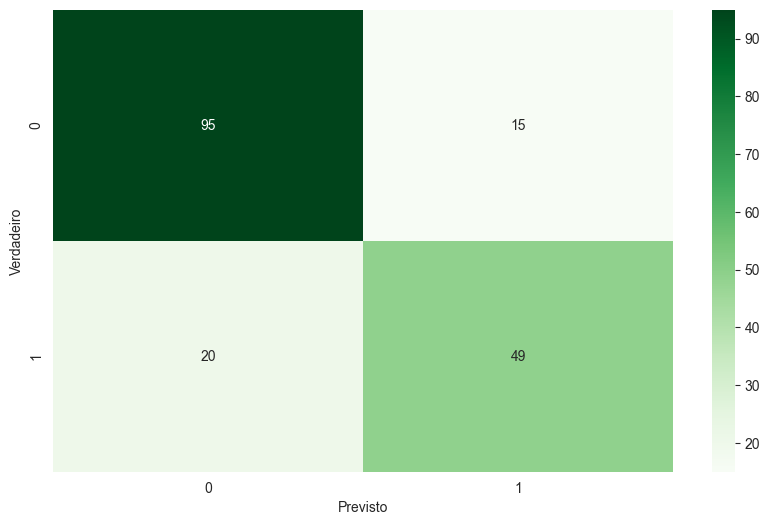


Relatório de Classificação (Floresta Aleatória):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [15]:
# Célula 12: Avaliando o Modelo de Floresta Aleatória

# Acurácia
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Acurácia (Floresta Aleatória): {accuracy_rf:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão (Floresta Aleatória):")
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação (Floresta Aleatória):")
print(classification_report(y_val, y_pred_rf))

In [16]:
# Célula 13: Otimizando o Random Forest com GridSearchCV

# Definindo a grade de hiperparâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Instanciando o GridSearchCV
# cv=5 significa 5-fold cross-validation
# n_jobs=-1 usa todos os processadores disponíveis
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Executando a busca em grade nos dados de treino completos
# (Usamos X e y, não os divididos, pois o GridSearchCV faz sua própria divisão interna)
grid_search.fit(X, y)

# Mostrando os melhores parâmetros encontrados
print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Mostrando a melhor acurácia durante a busca
print(f"\nMelhor acurácia (cross-validation): {grid_search.best_score_:.4f}")

# O melhor modelo já está treinado e salvo em 'best_estimator_'
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Melhores hiperparâmetros encontrados:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Melhor acurácia (cross-validation): 0.8306


In [17]:
# Célula 14: Fazendo a previsão final e gerando o arquivo de submissão

# Usar o melhor modelo encontrado pelo GridSearchCV para prever nos dados de teste
final_predictions = best_rf_model.predict(X_test_final)

# Criando o DataFrame para submissão no formato exigido pelo Kaggle
submission = pd.DataFrame({
    'PassengerId': passenger_id_test,
    'Survived': final_predictions
})

# Salvando o DataFrame como um arquivo .csv
# index=False é crucial para não salvar o índice do DataFrame no arquivo
submission.to_csv('submission.csv', index=False)

print("Arquivo 'submission.csv' gerado com sucesso!")
print("Primeiras 5 linhas do arquivo de submissão:")
submission.head()

Arquivo 'submission.csv' gerado com sucesso!
Primeiras 5 linhas do arquivo de submissão:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Conclusão do Projeto

Parabéns! Você completou um ciclo completo de um projeto de Machine Learning:
- Carregou e explorou os dados.
- Realizou limpeza e engenharia de features.
- Treinou múltiplos modelos de classificação.
- Avaliou e comparou a performance deles.
- Otimizou o melhor modelo com `GridSearchCV`.
- Gerou um arquivo de previsão para uma competição real.

Este é um passo fundamental na sua jornada como cientista de dados!

### Dicas Extras e Próximos Passos

#### Boas Práticas e Erros Comuns
* **Data Leakage (Vazamento de Dados):** O erro mais comum é aplicar transformações (como calcular a mediana) usando o dataset *inteiro* antes de dividir em treino e teste. O correto é sempre calcular médias, medianas, etc., **apenas** com os dados de treino e depois aplicar essa transformação nos dados de validação/teste. No nosso caso, como o dataset é pequeno, combinamos para simplificar, mas em projetos maiores, use o `Pipeline` do Scikit-learn para evitar isso.
* **Reprodutibilidade:** Sempre use `random_state` em algoritmos e funções que têm aleatoriedade (como `train_test_split`, `RandomForestClassifier`). Isso garante que seus resultados sejam os mesmos toda vez que você rodar o notebook.
* **Feature Scaling:** Não usamos aqui, pois Árvores de Decisão e Random Forest não são sensíveis à escala das features. Mas para outros modelos como Regressão Logística, SVM ou redes neurais, é **essencial** normalizar ou padronizar seus dados numéricos (usando `StandardScaler` ou `MinMaxScaler` do Scikit-learn).

#### Como Ir Além com Este Dataset
1.  **Engenharia de Features Avançada:**
    * Extraia o título dos passageiros da coluna `Name` (ex: "Mr.", "Mrs.", "Miss.", "Master."). Isso pode ser uma feature poderosa.
    * Crie "bins" (faixas) para `Age` e `Fare`. Em vez de usar a idade exata, você pode ter categorias como "Criança", "Adolescente", "Adulto", "Idoso".
2.  **Experimente Outros Modelos:**
    * `LogisticRegression`: Um modelo linear simples e ótimo como baseline.
    * `GradientBoostingClassifier`: Geralmente um dos modelos com melhor performance.
    * `XGBoost`, `LightGBM`, `CatBoost`: Implementações de Gradient Boosting extremamente populares e eficientes.
3.  **Validação Cruzada (Cross-Validation):** Em vez de um único `train_test_split`, use `cross_val_score` para ter uma estimativa mais robusta da performance do seu modelo. O `GridSearchCV` já faz isso por baixo dos panos.
4.  **Ensembling/Stacking:** Combine as previsões de vários modelos diferentes para criar um "super modelo" que pode ser ainda mais preciso.

Continue explorando e experimentando. O aprendizado em Machine Learning vem com a prática contínua.